In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('Scoring - Experian.csv',sep=';')

In [6]:
ids = pd.read_csv('ids.csv')

In [3]:
df.head()

,FechaCierre,Identificacion,TipoIdentificacion,Contrato,Comport_Pago_Gas,Comport_Pago_Brilla,Edad0Gas,Edad30Gas,Edad60Gas,Edad90Gas,...,DeudaDiferida,EdadMora,PlazoGas,CuotasPendientesGas,SaldoInicialGas,PlazoBrilla,CuotasPendientesBrilla,SaldoInicialBrilla,CuotaGas,CuotaBrilla
0,28/02/2019,26816647,Cédula,48237782,1-Pago A Tiempo,1-Pago A Tiempo,13,0,0,0,...,$ 0,0,48.0,36.0,$ 127.053,36.0,35.0,$ 566.088,$ 9.472,$ 13.727
1,28/02/2019,8736917,Cédula,6102546,2-Pago Atrasado a 60 Dias,1-Pago A Tiempo,3,9,1,0,...,$ 99.198,38,48.0,36.0,$ 261.724,36.0,36.0,$ 2.361.498,$ 17.266,$ 29.994
2,28/02/2019,26757900,Cédula,16103889,1-Pago A Tiempo,1-Pago A Tiempo,13,0,0,0,...,$ 78.850,0,48.0,36.0,$ 197.770,36.0,36.0,$ 4.920.101,$ 7.964,$ 94.406
3,28/02/2019,32610825,Cédula,48088085,2-Pago Atrasado a 60 Dias,NaN,7,3,3,0,...,$ 50.589,0,48.0,36.0,$ 131.851,0.0,0.0,$ 0,$ 12.660,$ 0
4,28/02/2019,77021174,Cédula,6206260,1-Pago A Tiempo,1-Pago A Tiempo,12,1,0,0,...,$ 48.439,-1,48.0,36.0,$ 95.045,0.0,0.0,$ 0,$ 6.448,$ 0


In [7]:
ids.head()

,Identificacion
0,1001818611
1,1001817132
2,1001831601
3,1001799296
4,1001712330


In [22]:
def label(df):
  node_Brilla = []
  riesgo_Brilla = []  
  node_GDC = []
  riesgo_GDC = []  
  for i in range(0,len(df)):
    # Brilla
    if (df['Edad60Brilla'].iloc[i] <= 0) and (df['Edad0Brilla'].iloc[i] > 8) and (df['CuotasPendientesBrilla'].iloc[i] <= 7 or np.isnan(df['CuotasPendientesBrilla'].iloc[i])) and (df['Edad30Brilla'].iloc[i] <= 0):
      node_Brilla.append(1)
      riesgo_Brilla.append('Nivel Bajo')
  
    elif (df['Edad60Brilla'].iloc[i] <= 0) and (df['Edad0Brilla'].iloc[i] > 8) and (df['CuotasPendientesBrilla'].iloc[i] <= 7 or np.isnan(df['CuotasPendientesBrilla'].iloc[i])) and (df['Edad30Brilla'].iloc[i] > 0):
      node_Brilla.append(2)
      riesgo_Brilla.append('Nivel Bajo')
    
    elif (df['Edad60Brilla'].iloc[i] <= 0) and (df['Edad0Brilla'].iloc[i] > 8) and (df['CuotasPendientesBrilla'].iloc[i] > 7):
      node_Brilla.append(3)
      riesgo_Brilla.append('Nivel Medio') # Bajo -> Medio V.2
    
    elif (df['Edad60Brilla'].iloc[i] <= 0) and (df['Edad0Brilla'].iloc[i] > 1 and df['Edad0Brilla'].iloc[i] <= 8) and (df['CuotasPendientesBrilla'].iloc[i] <= 34 or np.isnan(df['CuotasPendientesBrilla'].iloc[i])):
      node_Brilla.append(4)
      riesgo_Brilla.append('Nivel Medio')
    
    elif (df['Edad60Brilla'].iloc[i] <= 0) and (df['Edad0Brilla'].iloc[i] > 1 and df['Edad0Brilla'].iloc[i] <= 8) and (df['CuotasPendientesBrilla'].iloc[i] > 34):
      node_Brilla.append(5)
      riesgo_Brilla.append('Nivel Medio')

    elif (df['Edad60Brilla'].iloc[i] <= 0) and (df['Edad0Brilla'].iloc[i] <= 1):
      node_Brilla.append(6)
      riesgo_Brilla.append('Nivel Medio')

    elif (df['Edad60Brilla'].iloc[i] > 0):
      node_Brilla.append(7)
      riesgo_Brilla.append('Nivel Alto')
    
    else:
      node_Brilla.append('MISSING')
      riesgo_Brilla.append('MISSING')
        
      
    # Gas
    if (df['Comport_Pago_Gas'].iloc[i] == '1-Pago A Tiempo') and (df['Edad0Gas'].iloc[i] > 12) and (df['CuotasPendientesGas'].iloc[i] <= 35):
      node_GDC.append(1)
      riesgo_GDC.append('Nivel Bajo')
    
    elif (df['Comport_Pago_Gas'].iloc[i] == '1-Pago A Tiempo') and (df['Edad0Gas'].iloc[i] > 12) and (df['CuotasPendientesGas'].iloc[i] > 35 or np.isnan(df['CuotasPendientesGas'].iloc[i])):
      node_GDC.append(2)
      riesgo_GDC.append('Nivel Bajo')
    
    elif (df['Comport_Pago_Gas'].iloc[i] == '1-Pago A Tiempo') and (df['Edad0Gas'].iloc[i] > 8 and df['Edad0Gas'].iloc[i] <= 12) and (df['CuotasPendientesGas'].iloc[i] <= 35):
      node_GDC.append(3)
      riesgo_GDC.append('Nivel Bajo')
    
    elif (df['Comport_Pago_Gas'].iloc[i] == '1-Pago A Tiempo') and (df['Edad0Gas'].iloc[i] <= 8) and (df['CuotasPendientesGas'].iloc[i] <= 35):
      node_GDC.append(4)
      riesgo_GDC.append('Nivel Medio') # Bajo -> Medio V.3
    
    elif (df['Comport_Pago_Gas'].iloc[i] == '1-Pago A Tiempo') and (df['Edad0Gas'].iloc[i] > 8 and df['Edad0Gas'].iloc[i] <= 12) and (df['CuotasPendientesGas'].iloc[i] > 35 or np.isnan(df['CuotasPendientesGas'].iloc[i])):
      node_GDC.append(5)
      riesgo_GDC.append('Nivel Medio') # Bajo -> Medio V.2
    
    elif (df['Comport_Pago_Gas'].iloc[i] == '1-Pago A Tiempo') and (df['Edad0Gas'].iloc[i] <= 8) and (df['CuotasPendientesGas'].iloc[i] > 35 or np.isnan(df['CuotasPendientesGas'].iloc[i])):
      node_GDC.append(6)
      riesgo_GDC.append('Nivel Medio')
    
    elif (df['Comport_Pago_Gas'].iloc[i] == '2-Pago Atrasado a 60 Dias') and (df['Edad60Gas'].iloc[i] <= 1):
      node_GDC.append(7)
      riesgo_GDC.append('Nivel Medio')
    
    elif (df['Comport_Pago_Gas'].iloc[i] == '2-Pago Atrasado a 60 Dias') and (df['Edad60Gas'].iloc[i] > 1):
      node_GDC.append(8)
      riesgo_GDC.append('Nivel Medio')
    
    elif (df['Comport_Pago_Gas'].iloc[i] == '3-No Paga a 90 Dias'):
      node_GDC.append(9)
      riesgo_GDC.append('Nivel Alto')

    else:
      node_GDC.append('MISSING')
      riesgo_GDC.append('MISSING')

  
  return node_Brilla,node_GDC,riesgo_Brilla,riesgo_GDC

In [23]:
ids['Identificacion'] = ids['Identificacion'].astype(np.int64)

Funcion para limpiar los datos de Identificacion

In [24]:
import re
def eraser(s):
    return re.sub("[^0-9]", "", s)

In [25]:
df['Identificacion'] = df['Identificacion'].map(lambda Identificacion: int(eraser(Identificacion)))

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545482 entries, 0 to 545481
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   FechaCierre               545482 non-null  object 
 1   Identificacion            545482 non-null  int64  
 2   TipoIdentificacion        545482 non-null  object 
 3   Contrato                  545482 non-null  int64  
 4   Comport_Pago_Gas          545482 non-null  object 
 5   Comport_Pago_Brilla       240706 non-null  object 
 6   Edad0Gas                  545482 non-null  int64  
 7   Edad30Gas                 545482 non-null  int64  
 8   Edad60Gas                 545482 non-null  int64  
 9   Edad90Gas                 545482 non-null  int64  
 10  EdadM90Gas                545482 non-null  int64  
 11  Edad0Brilla               240706 non-null  float64
 12  Edad30Brilla              240706 non-null  float64
 13  Edad60Brilla              240706 non-null  f

Merge ambos DataFrames para solo seleccionar las Identificaciones de interes.

In [27]:
new_df = ids.merge(df,on='Identificacion',how='left')

In [28]:
new_df

,Identificacion,FechaCierre,TipoIdentificacion,Contrato,Comport_Pago_Gas,Comport_Pago_Brilla,Edad0Gas,Edad30Gas,Edad60Gas,Edad90Gas,...,DeudaDiferida,EdadMora,PlazoGas,CuotasPendientesGas,SaldoInicialGas,PlazoBrilla,CuotasPendientesBrilla,SaldoInicialBrilla,CuotaGas,CuotaBrilla
0,1001818611,28/02/2019,Cédula,48127159,2-Pago Atrasado a 60 Dias,2-Pago Atrasado a 60 Dias,0,12,1,0,...,$ 90.406,5,48.0,39.0,$ 308.252,60.0,49.0,$ 3.907.754,$ 15.177,$ 72.355
1,1001817132,28/02/2019,Cédula,48143601,1-Pago A Tiempo,1-Pago A Tiempo,10,3,0,0,...,$ 0,0,48.0,36.0,$ 113.379,0.0,0.0,$ 0,$ 18.326,$ 0
2,1001831601,28/02/2019,Cédula,66572060,1-Pago A Tiempo,NaN,5,8,0,0,...,$ 397.749,-1,48.0,36.0,$ 591.084,0.0,0.0,$ 0,$ 28.535,$ 0
3,1001831601,28/02/2019,Cédula,66572074,1-Pago A Tiempo,1-Pago A Tiempo,11,2,0,0,...,$ 393.490,-1,48.0,9.0,$ 561.721,15.0,10.0,$ 2.949.800,$ 12.736,$ 109.157
4,1001799296,28/02/2019,Cédula,48207279,1-Pago A Tiempo,1-Pago A Tiempo,8,5,0,0,...,$ 84.147,14,48.0,36.0,$ 156.332,36.0,36.0,$ 3.948.013,$ 8.033,$ 63.512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76019,9271418,28/02/2019,Cédula,66363359,1-Pago A Tiempo,NaN,13,0,0,0,...,$ 0,0,NaN,NaN,NaN,NaN,NaN,NaN,$ 19.085,$ 0
76020,98548517,28/02/2019,Cédula,1175910,1-Pago A Tiempo,NaN,7,6,0,0,...,$ 86.663,-1,48.0,47.0,$ 266.446,0.0,0.0,$ 0,$ 27.477,$ 0
76021,98548517,28/02/2019,Cédula,1175909,1-Pago A Tiempo,1-Pago A Tiempo,10,3,0,0,...,$ 141.909,0,48.0,24.0,$ 192.316,0.0,0.0,$ 0,$ 35.769,$ 2.694
76022,980116,28/02/2019,Cédula,48185218,1-Pago A Tiempo,NaN,9,4,0,0,...,$ 5.193,-1,NaN,NaN,NaN,NaN,NaN,NaN,$ 6.047,$ 0


Correr el modelo con le nuevo DataFrame

In [29]:
node_Brilla,node_GDC,riesgo_Brilla,riesgo_GDC = label(new_df)

In [30]:
new_df['Nodo Brilla'] = node_Brilla
new_df['Riesgo Brilla'] = riesgo_Brilla
new_df['Nodo Gas'] = node_GDC
new_df['Riesgo Gas'] = riesgo_GDC

In [31]:
print(new_df.shape)
new_df.head()

(76024, 40)


,Identificacion,FechaCierre,TipoIdentificacion,Contrato,Comport_Pago_Gas,Comport_Pago_Brilla,Edad0Gas,Edad30Gas,Edad60Gas,Edad90Gas,...,SaldoInicialGas,PlazoBrilla,CuotasPendientesBrilla,SaldoInicialBrilla,CuotaGas,CuotaBrilla,Nodo Brilla,Riesgo Brilla,Nodo Gas,Riesgo Gas
0,1001818611,28/02/2019,Cédula,48127159,2-Pago Atrasado a 60 Dias,2-Pago Atrasado a 60 Dias,0,12,1,0,...,$ 308.252,60.0,49.0,$ 3.907.754,$ 15.177,$ 72.355,7,Nivel Alto,7,Nivel Medio
1,1001817132,28/02/2019,Cédula,48143601,1-Pago A Tiempo,1-Pago A Tiempo,10,3,0,0,...,$ 113.379,0.0,0.0,$ 0,$ 18.326,$ 0,1,Nivel Bajo,5,Nivel Medio
2,1001831601,28/02/2019,Cédula,66572060,1-Pago A Tiempo,NaN,5,8,0,0,...,$ 591.084,0.0,0.0,$ 0,$ 28.535,$ 0,MISSING,MISSING,6,Nivel Medio
3,1001831601,28/02/2019,Cédula,66572074,1-Pago A Tiempo,1-Pago A Tiempo,11,2,0,0,...,$ 561.721,15.0,10.0,$ 2.949.800,$ 12.736,$ 109.157,3,Nivel Medio,3,Nivel Bajo
4,1001799296,28/02/2019,Cédula,48207279,1-Pago A Tiempo,1-Pago A Tiempo,8,5,0,0,...,$ 156.332,36.0,36.0,$ 3.948.013,$ 8.033,$ 63.512,5,Nivel Medio,6,Nivel Medio


In [32]:
def riesgo_total(df):
  riesgo_combinado = []
  for i in range(len(df)):
    if df['Riesgo Brilla'].iloc[i] != 'MISSING':
      riesgo_combinado.append(df['Riesgo Brilla'].iloc[i])
    else:
      riesgo_combinado.append(df['Riesgo Gas'].iloc[i])
    
  
  df['Riesgo Combinado'] = riesgo_combinado
  
  return df

In [33]:
new_df = riesgo_total(new_df)

In [34]:
new_df.head()

,Identificacion,FechaCierre,TipoIdentificacion,Contrato,Comport_Pago_Gas,Comport_Pago_Brilla,Edad0Gas,Edad30Gas,Edad60Gas,Edad90Gas,...,PlazoBrilla,CuotasPendientesBrilla,SaldoInicialBrilla,CuotaGas,CuotaBrilla,Nodo Brilla,Riesgo Brilla,Nodo Gas,Riesgo Gas,Riesgo Combinado
0,1001818611,28/02/2019,Cédula,48127159,2-Pago Atrasado a 60 Dias,2-Pago Atrasado a 60 Dias,0,12,1,0,...,60.0,49.0,$ 3.907.754,$ 15.177,$ 72.355,7,Nivel Alto,7,Nivel Medio,Nivel Alto
1,1001817132,28/02/2019,Cédula,48143601,1-Pago A Tiempo,1-Pago A Tiempo,10,3,0,0,...,0.0,0.0,$ 0,$ 18.326,$ 0,1,Nivel Bajo,5,Nivel Medio,Nivel Bajo
2,1001831601,28/02/2019,Cédula,66572060,1-Pago A Tiempo,NaN,5,8,0,0,...,0.0,0.0,$ 0,$ 28.535,$ 0,MISSING,MISSING,6,Nivel Medio,Nivel Medio
3,1001831601,28/02/2019,Cédula,66572074,1-Pago A Tiempo,1-Pago A Tiempo,11,2,0,0,...,15.0,10.0,$ 2.949.800,$ 12.736,$ 109.157,3,Nivel Medio,3,Nivel Bajo,Nivel Medio
4,1001799296,28/02/2019,Cédula,48207279,1-Pago A Tiempo,1-Pago A Tiempo,8,5,0,0,...,36.0,36.0,$ 3.948.013,$ 8.033,$ 63.512,5,Nivel Medio,6,Nivel Medio,Nivel Medio


In [36]:
def add_priority(df,column):
    new_riesgo = []
    for i in range(0,len(df)):
        if df[column].iloc[i] == 'Nivel Bajo':
            new_riesgo.append(1)
        elif df[column].iloc[i] == 'Nivel Medio':
            new_riesgo.append(2)
        elif df[column].iloc[i] == 'Nivel Alto':
            new_riesgo.append(3)
    
    df['Riesgo Combinado Priorizado'] = new_riesgo
    
    return df

In [37]:
new_df = add_priority(new_df,'Riesgo Combinado')

In [38]:
new_df.head()

,Identificacion,FechaCierre,TipoIdentificacion,Contrato,Comport_Pago_Gas,Comport_Pago_Brilla,Edad0Gas,Edad30Gas,Edad60Gas,Edad90Gas,...,CuotasPendientesBrilla,SaldoInicialBrilla,CuotaGas,CuotaBrilla,Nodo Brilla,Riesgo Brilla,Nodo Gas,Riesgo Gas,Riesgo Combinado,Riesgo Combinado Priorizado
0,1001818611,28/02/2019,Cédula,48127159,2-Pago Atrasado a 60 Dias,2-Pago Atrasado a 60 Dias,0,12,1,0,...,49.0,$ 3.907.754,$ 15.177,$ 72.355,7,Nivel Alto,7,Nivel Medio,Nivel Alto,3
1,1001817132,28/02/2019,Cédula,48143601,1-Pago A Tiempo,1-Pago A Tiempo,10,3,0,0,...,0.0,$ 0,$ 18.326,$ 0,1,Nivel Bajo,5,Nivel Medio,Nivel Bajo,1
2,1001831601,28/02/2019,Cédula,66572060,1-Pago A Tiempo,NaN,5,8,0,0,...,0.0,$ 0,$ 28.535,$ 0,MISSING,MISSING,6,Nivel Medio,Nivel Medio,2
3,1001831601,28/02/2019,Cédula,66572074,1-Pago A Tiempo,1-Pago A Tiempo,11,2,0,0,...,10.0,$ 2.949.800,$ 12.736,$ 109.157,3,Nivel Medio,3,Nivel Bajo,Nivel Medio,2
4,1001799296,28/02/2019,Cédula,48207279,1-Pago A Tiempo,1-Pago A Tiempo,8,5,0,0,...,36.0,$ 3.948.013,$ 8.033,$ 63.512,5,Nivel Medio,6,Nivel Medio,Nivel Medio,2


In [39]:
df_copy = new_df.copy()

In [40]:
new_df = df_copy.loc[df_copy.groupby(['Identificacion'])['Riesgo Combinado Priorizado'].idxmax()].reset_index(drop=True)

In [41]:
def settle_priority(df,column):
    new_riesgo = []
    for i in range(0,len(df)):
        if df[column].iloc[i] == 1:
            new_riesgo.append('Nivel Bajo')
        elif df[column].iloc[i] == 2:
            new_riesgo.append('Nivel Medio')
        elif df[column].iloc[i] == 3:
            new_riesgo.append('Nivel Alto')
            
    df['Riesgo Combinado Nuevo'] = new_riesgo
    
    return df

In [42]:
df_copy = settle_priority(new_df,'Riesgo Combinado Priorizado')

In [44]:
df_copy.head()

,Identificacion,FechaCierre,TipoIdentificacion,Contrato,Comport_Pago_Gas,Comport_Pago_Brilla,Edad0Gas,Edad30Gas,Edad60Gas,Edad90Gas,...,SaldoInicialBrilla,CuotaGas,CuotaBrilla,Nodo Brilla,Riesgo Brilla,Nodo Gas,Riesgo Gas,Riesgo Combinado,Riesgo Combinado Priorizado,Riesgo Combinado Nuevo
0,22,28/02/2019,Cédula,48019919,1-Pago A Tiempo,NaN,10,3,0,0,...,$ 0,$ 18.845,$ 0,MISSING,MISSING,3,Nivel Bajo,Nivel Bajo,1,Nivel Bajo
1,24,28/02/2019,Cédula,4125419,1-Pago A Tiempo,NaN,12,1,0,0,...,$ 0,$ 34.351,$ 0,MISSING,MISSING,3,Nivel Bajo,Nivel Bajo,1,Nivel Bajo
2,122775,28/02/2019,Cédula,4156894,1-Pago A Tiempo,1-Pago A Tiempo,11,2,0,0,...,$ 3.703.997,$ 21.520,$ 72.946,3,Nivel Medio,3,Nivel Bajo,Nivel Medio,2,Nivel Medio
3,124527,28/02/2019,Cédula,2119147,1-Pago A Tiempo,NaN,8,5,0,0,...,$ 0,$ 28.626,$ 0,MISSING,MISSING,4,Nivel Medio,Nivel Medio,2,Nivel Medio
4,136089,28/02/2019,Cédula de Extranjería,10000397,2-Pago Atrasado a 60 Dias,2-Pago Atrasado a 60 Dias,7,5,1,0,...,$ 0,$ 13.975,$ 7.411,7,Nivel Alto,7,Nivel Medio,Nivel Alto,3,Nivel Alto


In [45]:
df_copy['Riesgo Combinado Nuevo'].value_counts()

Nivel Medio    38698
Nivel Bajo     15367
Nivel Alto      7868
Name: Riesgo Combinado Nuevo, dtype: int64

In [ ]:
df_copy.to_excel('Modelo 3.xlsx')

In [48]:
keys, counts = np.unique(df_copy['Riesgo Combinado Nuevo'], return_counts=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


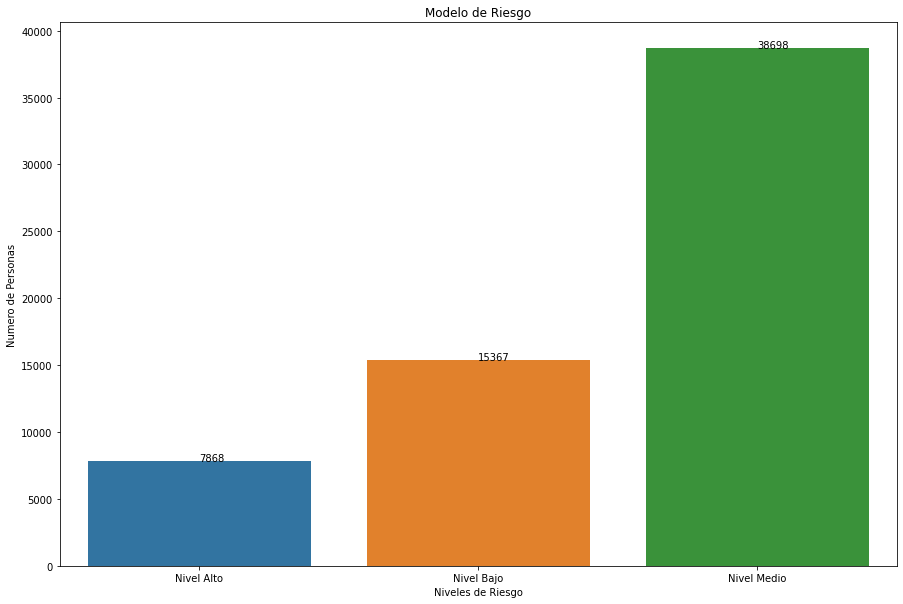

In [77]:
plt.figure(figsize=(15,10))

def addlabels(x,y):
    for i in range(len(keys)):
        plt.text(i,y[i],y[i])

ax = sns.barplot(keys, counts)
addlabels(keys, counts)
plt.title("Modelo de Riesgo")
plt.xlabel("Niveles de Riesgo")
plt.ylabel("Numero de Personas")
plt.show()

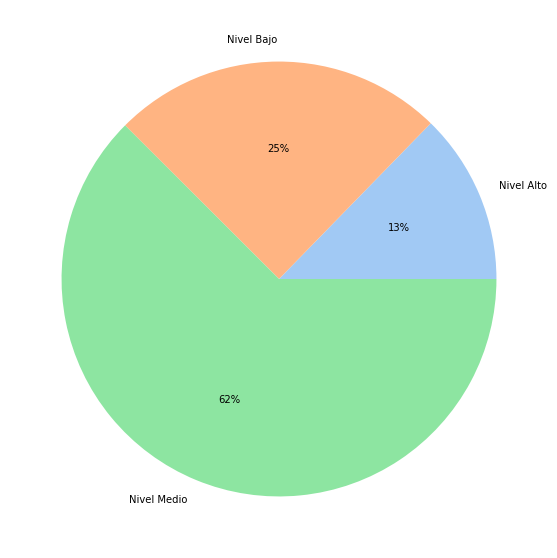

In [78]:
colors = sns.color_palette('pastel')[0:3]

plt.figure(figsize=(15,10))

#create pie chart
plt.pie(counts, labels = keys, colors = colors, autopct='%.0f%%',)
plt.show()